In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functionScripts.functions import *
import scipy
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display, HTML

In [2]:


df1 = pd.read_csv('../Data/daily_data_assets.csv')
df1.set_index('date', inplace=True)
df2 = pd.read_csv('../Data/monthly_assets.csv')
df2.set_index('date', inplace=True)

# Pick 4 assets to create a portfolio first
port1 = df1[['SPX Index', 'LEGATRUU Index', 'XAU Curncy']].dropna()
port1.index = pd.DatetimeIndex(port1.index)

In [ ]:
### Remove FX from portfolio. Use equity, bonds, commods, ETFs
### FX (for hedging purposes, not in portfolio)
## 3M forwards 

In [3]:
px_mom = computeMomentum(port1[["SPX Index"]], 1, "2000-01-03", end = "2010-12-31", asset_name = "SPX Index")
px_mom_3 = computeMomentum(port1[["SPX Index"]], 3, "2000-01-03", end = "2010-12-31", asset_name = "SPX Index")
px_mom_6 = computeMomentum(port1[["SPX Index"]], 6, "2000-01-03", end = "2010-12-31", asset_name = "SPX Index")

/Users/clarencetee/Desktop/SMU_MSFE/Regime-Analysis-Positioning/Regime-Analysis-Positioning/functionScripts/functions.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_df_2 = all_df.join(df.Price).drop(['Price_full'], axis=1).fillna(method='ffill')
/Users/clarencetee/Desktop/SMU_MSFE/Regime-Analysis-Positioning/Regime-Analysis-Positioning/functionScripts/functions.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_df_2 = all_df.join(df.Price).drop(['Price_full'], axis=1).fillna(method='ffill')
/Users/clarencetee/Desktop/SMU_MSFE/Regime-Analysis-Positioning/Regime-Analysis-Positioning/functionScripts/functions.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_df_2 = all_df.join(df.Price).drop(['P

#### Trend Following

In [7]:
trend_following_sig = port1[["SPX Index"]].loc[:'2010-12-31'].copy()
trend_following_sig

,SPX Index
date,
2000-01-03,1455.22
2000-01-04,1399.42
2000-01-05,1402.11
2000-01-06,1403.45
2000-01-07,1441.47
...,...
2010-12-27,1257.54
2010-12-28,1258.51
2010-12-29,1259.78


Text(0.5, 0.98, 'Trend Following (50DMA)')

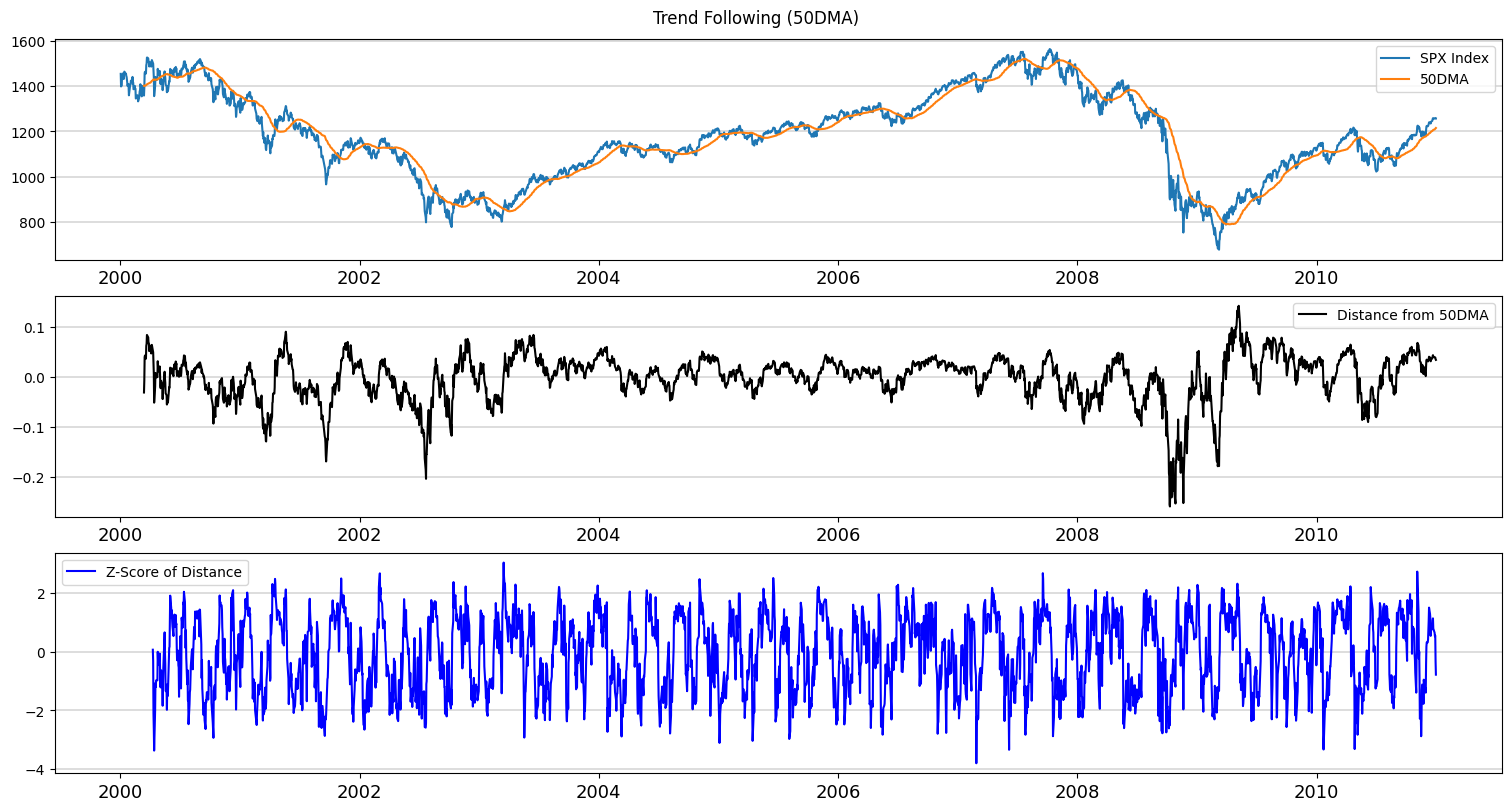

In [8]:
trend_following_sig["50DMA"] = trend_following_sig[["SPX Index"]].rolling(50).mean()
trend_following_sig["dist_50dma"] = (trend_following_sig["SPX Index"] / trend_following_sig["50DMA"])  - 1
z_50dma_dist_obj = trend_following_sig["dist_50dma"].rolling(20)
z_50dma_dist_z = (trend_following_sig["dist_50dma"] - z_50dma_dist_obj.mean()) / z_50dma_dist_obj.std()

fig, ax = plt.subplots(3, 1, figsize = (15, 8), constrained_layout = True, sharex = True)

ax[0].plot(trend_following_sig["SPX Index"], label = "SPX Index")
ax[0].plot(trend_following_sig["50DMA"], label = "50DMA")
ax[0].grid(axis='y', linewidth=1.2, alpha=0.5)
ax[0].legend()
ax[0].xaxis.set_tick_params(which='both', labelbottom=True, labelsize=13)
ax[1].plot(trend_following_sig["dist_50dma"], label = "Distance from 50DMA", color = "black")
ax[1].grid(axis='y', linewidth=1.2, alpha=0.5)
ax[1].legend()
ax[1].xaxis.set_tick_params(which='both', labelbottom=True, labelsize=13)
ax[2].plot(z_50dma_dist_z, label = "Z-Score of Distance", color = "blue")
ax[2].grid(axis='y', linewidth=1.2, alpha=0.5)
ax[2].legend()
ax[2].xaxis.set_tick_params(which='both', labelbottom=True, labelsize=13)
fig.suptitle("Trend Following (50DMA)")

Text(0.5, 0.98, 'Trend Following (200DMA)')

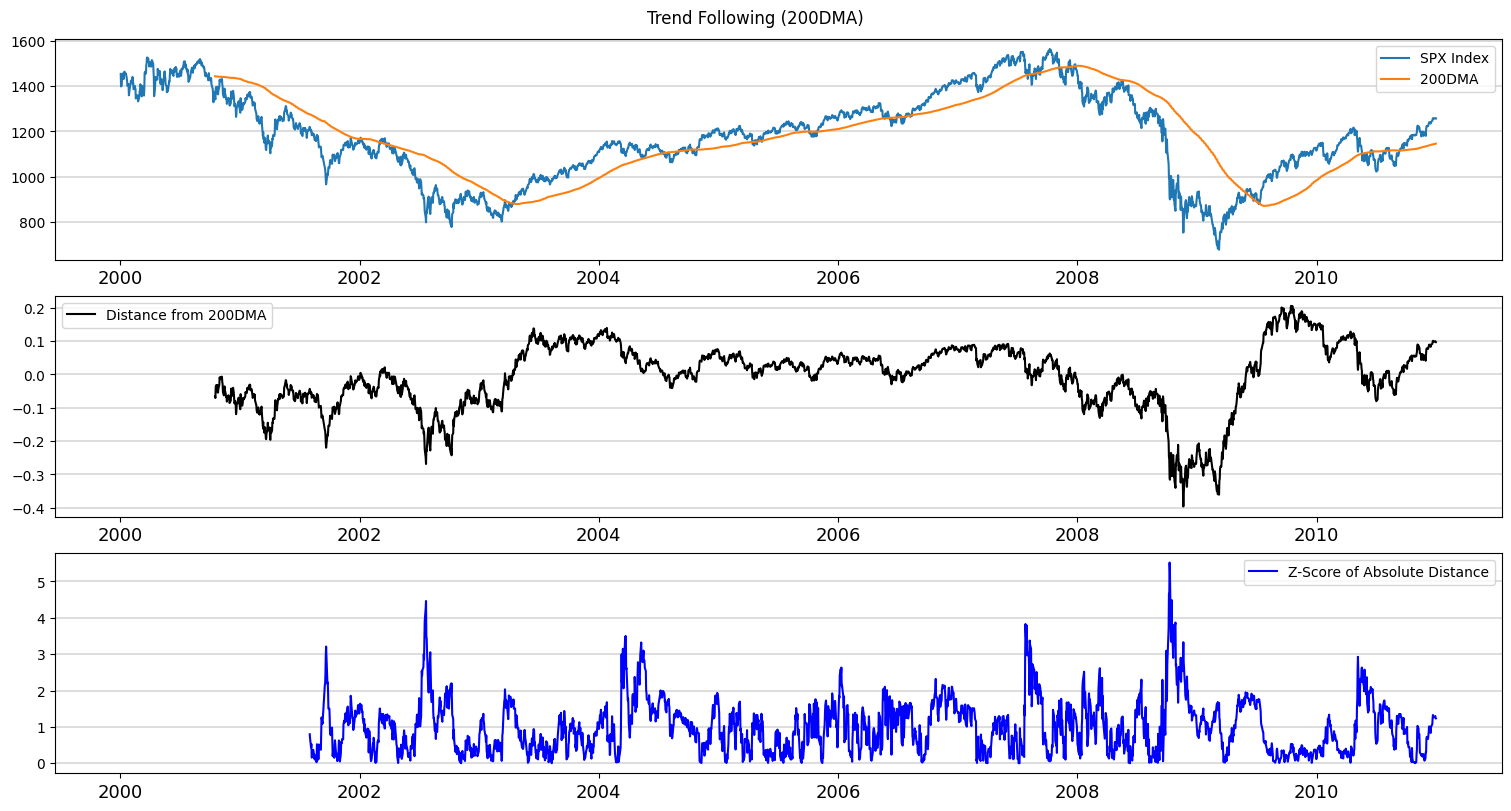

In [9]:
trend_following_sig["200DMA"] = trend_following_sig[["SPX Index"]].rolling(200).mean()
trend_following_sig["dist_200dma"] = (trend_following_sig["SPX Index"] / trend_following_sig["200DMA"])  - 1
z_200dma_dist_obj = trend_following_sig["dist_200dma"].abs().rolling(200)
trend_following_sig["Z"] = (trend_following_sig["dist_200dma"].abs() - z_200dma_dist_obj.mean()) / z_200dma_dist_obj.std()

# Create signal
trend_following_sig["Direction"] = np.where(trend_following_sig.dist_200dma >= 0, 1, -1)
# trend_following_sig["Size"] = np.where(trend_following_sig.Z > 1, np.where(trend_following_sig.Z > 2, np.where(trend_following_sig.Z > 2, np.where(trend_following_sig.Z > 3, 3, 5), 3), 2), 1)

fig, ax = plt.subplots(3, 1, figsize = (15, 8), constrained_layout = True, sharex = True)

ax[0].plot(trend_following_sig["SPX Index"], label = "SPX Index")
ax[0].plot(trend_following_sig["200DMA"], label = "200DMA")
ax[0].grid(axis='y', linewidth=1.2, alpha=0.5)
ax[0].legend()
ax[0].xaxis.set_tick_params(which='both', labelbottom=True, labelsize=13)
ax[1].plot(trend_following_sig["dist_200dma"], label = "Distance from 200DMA", color = "black")
ax[1].grid(axis='y', linewidth=1.2, alpha=0.5)
ax[1].legend()
ax[1].xaxis.set_tick_params(which='both', labelbottom=True, labelsize=13)

ax[2].plot(trend_following_sig.Z.abs(), label = "Z-Score of Absolute Distance", color = "blue")
# ax[2].plot(trend_following_sig.Size, label = "Position Sizing", linestyle = "dotted", color = "red")
ax[2].grid(axis='y', linewidth=1.2, alpha=0.5)
ax[2].legend()
ax[2].xaxis.set_tick_params(which='both', labelbottom=True, labelsize=13)
fig.suptitle("Trend Following (200DMA)")

### Basic Momentum Strategy

In [148]:
px_mom ['Signal'] = np.where(px_mom.Mth_Prior_1_Return >= 0, 1, 0)
px_mom_3['Signal'] = np.where(px_mom_3.Mth_Prior_3_Return >= 0, 1, 0)
px_mom_6['Signal'] = np.where(px_mom_6.Mth_Prior_6_Return >= 0, 1, 0)

sig_1_mo = px_mom.Signal
sig_1_mo.name = 'PX_Mom_1'
sig_3_mo = px_mom_3.Signal
sig_3_mo.name = 'PX_Mom_3'
sig_6_mo = px_mom_6.Signal
sig_6_mo.name = 'PX_Mom_6'

all_px_mom_sig = pd.concat([sig_1_mo, sig_3_mo, sig_6_mo], axis=1)
all_px_mom_sig['Sig_Strength'] = all_px_mom_sig.sum(axis=1)
all_px_mom_sig['Sig_Strength_Adj'] = all_px_mom_sig['Sig_Strength'].shift(1)
all_px_mom_sig['SPX_ret'] = port1[["SPX Index"]].pct_change()
all_px_mom_sig.dropna(inplace=True)
all_px_mom_sig['Positioning'] = all_px_mom_sig['Sig_Strength_Adj'].map({0 : 0.1, 1 : 0.4, 2 : 0.6, 3: 0.9})
all_px_mom_sig['Portfolio'] = all_px_mom_sig['Positioning'] * all_px_mom_sig['SPX_ret']
all_px_mom_sig

,PX_Mom_1,PX_Mom_3,PX_Mom_6,Sig_Strength,Sig_Strength_Adj,SPX_ret,Positioning,Portfolio
date,,,,,,,,
2000-07-03,0,0.0,1.0,1.0,1.0,0.010271,0.4,0.004108
2000-07-05,0,0.0,1.0,1.0,1.0,-0.015862,0.4,-0.006345
2000-07-06,0,0.0,1.0,1.0,1.0,0.007219,0.4,0.002888
2000-07-07,1,0.0,1.0,2.0,1.0,0.015261,0.4,0.006104
2000-07-10,1,0.0,1.0,2.0,2.0,-0.002218,0.6,-0.001331
...,...,...,...,...,...,...,...,...
2010-12-27,1,1.0,1.0,3.0,3.0,0.000613,0.9,0.000551
2010-12-28,1,1.0,1.0,3.0,3.0,0.000771,0.9,0.000694
2010-12-29,1,1.0,1.0,3.0,3.0,0.001009,0.9,0.000908


In [149]:
exportPerformanceMetrics(all_px_mom_sig["Portfolio"], all_px_mom_sig["SPX_ret"])

,Strategy,Benchmark
Performance Metrics (2000-07-03 till 2010-12-31),,
CAGR %,1.01%,-1.38%
Volatility,8.82%,21.74%
Sharpe Ratio,0.11,-0.06
Max Drawdown %,-24.42%,-56.78%
Return/MaxDrawdown,0.04,0.02


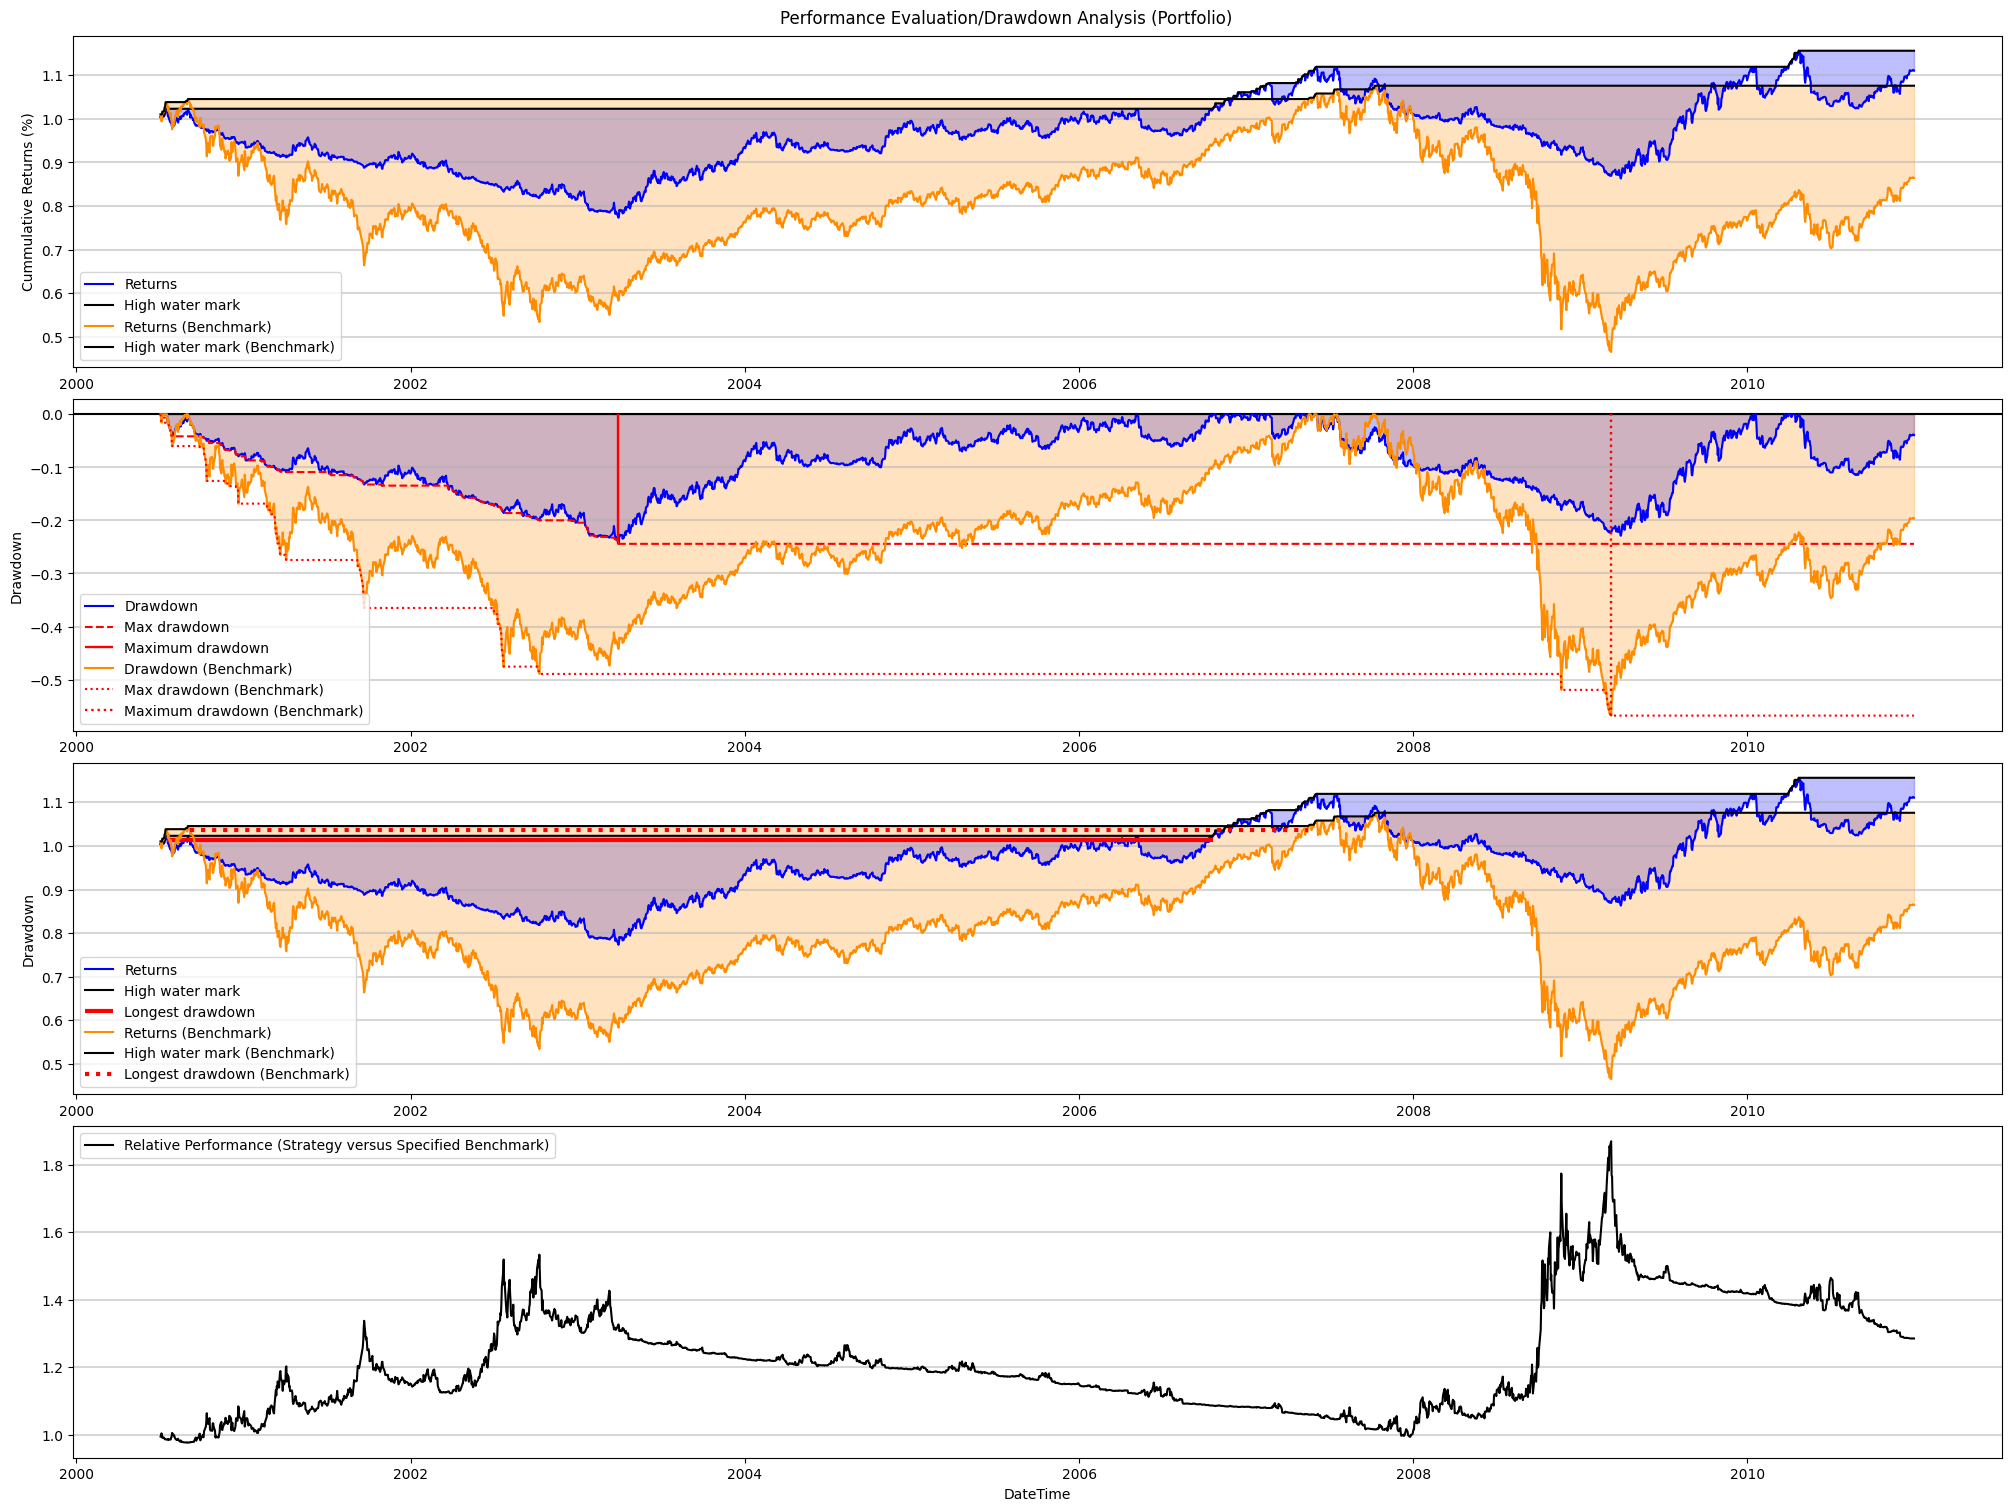

In [150]:
drawdownCharts(all_px_mom_sig["Portfolio"], benchmark = all_px_mom_sig["SPX_ret"], includeBenchmark = True, showPlot=True)